<a href="https://colab.research.google.com/github/NanaAkwasiAbayieBoateng/Machine-Learning-Interpretability/blob/master/Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Introduction
Machine learning algorithms are often said to be black-box models in that there is not a good idea of how the model is arriving at predictions.This has often hindered adopting machine learning models in certain industires where interpretation is key. Examples such areas include  financial institutions who are regulated and have to explain decisions such as rejecting loan application or detecting fraud. Model interprtability aalows you to determine how much you can trust a prediction model as a whole and provides insights that can be used to improve the model.

First we need to install the libraries for machine learning intrepatabilty and model building.
The dataset fro this post can be found here [here](https://archive.ics.uci.edu/ml/datasets/adult). The data has features to  predict whether income exceeds $50K/yr based on census data. It is also known as "Census Income" dataset.

#### Install  Packages

In [0]:
#!pip install eli5
# pdpbox has some problems in their pypi version
#!pip install git+https://github.com/SauceCat/PDPbox
#!pip install shap

#or
#!conda install -c conda-forge shap
#!pip install lime
#!pip install plotly_express
#!pip install seaborn

In [0]:
# Load All Libraries
from __future__ import print_function
# future allows compatitbility between python two and three modules
print(__doc__)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import TransformerMixin
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lime import lime_text
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import sklearn
import sklearn.datasets
import sklearn.ensemble
import sklearn
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_boston
import xgboost as xgb
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import preprocessing
import plotly_express as px
import datetime
from datetime import *
import seaborn as sns; sns.set()
import shap
import warnings
from eli5.sklearn import PermutationImportance
warnings.filterwarnings("ignore", category=FutureWarning)
#from __future__ import print_function

Automatically created module for IPython interactive environment


In [0]:
!ls

heart.csv  sample_data


#### Loading Data

[link to data](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Content

Attribute Information: 
Only 14 attributes used: 
1. age: age in years
2. sex: sex (1 = male; 0 = female) 
3. cp: chest pain type 
        -- Value 1: typical angina 
        -- Value 2: atypical angina 
        -- Value 3: non-anginal pain 
        -- Value 4: asymptomatic  
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)  
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. restecg: resting electrocardiographic results 
            -- Value 0: normal 
            -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or                  depression of > 0.05 mV) 
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes'                    criteria  
8. thalach: maximum heart rate achieved  
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest  
11. slope: the slope of the peak exercise ST segment 
           -- Value 1: upsloping 
            -- Value 2: flat 
            -- Value 3: downsloping  
12. ca: number of major vessels (0-3) colored by flourosopy  
13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. target: diagnosis of heart disease (angiographic disease status) 
-- Value 0: < 50% diameter narrowing 
-- Value 1: > 50% diameter narrowing 
(in any major vessel: attributes 59 through 68 are vessels) 



In [0]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [0]:
uploaded = files.upload()

Saving heart.csv to heart.csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "heart.csv" with length 11328 bytes


In [0]:
uploaded

{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

In [0]:
heart_data=pd.read_csv(io.StringIO(uploaded['heart.csv'].decode('utf-8')))
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### Model Training
We will train a binary classification model using  xgboost model to predict Income of a person using features in the dataset above.

In [0]:
d=pd.DataFrame(heart_data.target.value_counts())

d=d.reset_index()

d.columns=['Prediction','Frequency']

#d['Prediction']=d['Prediction'].astype('category')
#d['Prediction']=d['Prediction'].astype(str)
d
#d['Heart_Diseae']=['Present','Absent']
#d.dtypes()
#d.info()

#px.bar(d, x="Heart_Diseae", y="Frequency",orientation="v", color='Heart_Diseae')

,Prediction,Frequency
0,1,165
1,0,138


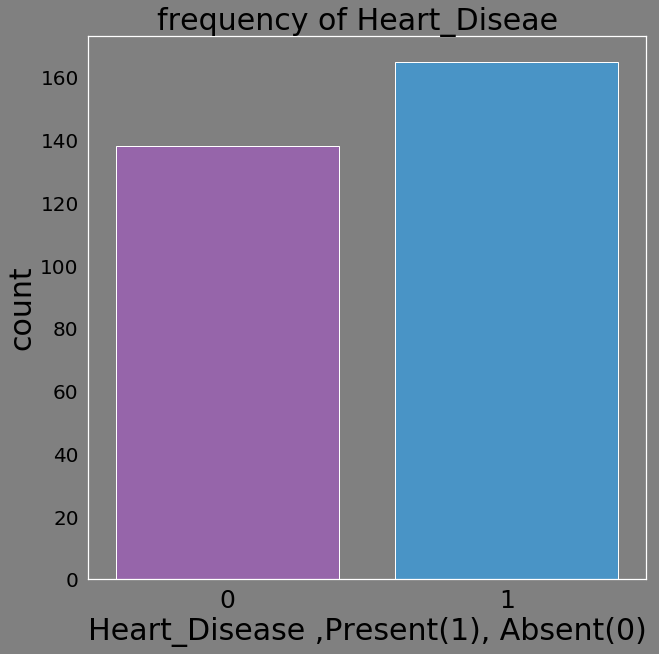

In [0]:
bg_color = (0.5, 0.5, 0.5)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "axes.titlesize":30,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(10.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

#plt.rcParams.update(params)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.countplot(heart_data.target,palette=flatui)
plt.xlabel('Heart_Disease ,Present(1), Absent(0)')
plt.title('frequency of Heart_Diseae  ')
plt.show()

In [0]:
X=heart_data.drop('target',axis=1)
Y=heart_data.target
scaler = StandardScaler()

#X = scaler.fit_transform(X)


train_X, val_X, train_y, val_y = train_test_split(X, Y,test_size=0.3, random_state=148)

In [0]:
#setting parameters for lightgbm

train_data=lgb.Dataset(train_X ,label=train_y)

param = {'num_leaves':150, 
         'objective':'binary',
         'max_depth':7,
         'learning_rate':.05,
         'is_unbalance':True,
         'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']


#training our model using light gbm
num_round=50
start=datetime.now()
lgbm=lgb.train(param,train_data,num_round)
stop=datetime.now()


#lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt')

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',
                        # class_weight='balanced', #used only in multiclass training
                         #is_unbalance ='True'   #used in binary class training    
                         objective='binary',
                         n_jobs=-1, 
                         verbose=0)

lgb_model = lgb_estimator.fit(X=train_X, y=train_y)

In [0]:
#Execution time of the model
execution_time_lgbm = stop-start
execution_time_lgbm

datetime.timedelta(0, 0, 109952)

In [0]:
#predicting on test set
ypred=lgb_model.predict(val_X)
ypred[0:5]  # showing first 5 predictions

array([1, 1, 1, 1, 0])

In [0]:
predictions = lgb_model.predict(val_X)
print("Confusion Matrix:")
print(confusion_matrix(val_y, predictions))
print()
print("Classification Report")
print(classification_report(val_y, predictions))

# ROC curve and Area-Under-Curve (AUC)
#calculating accuracy
accuracy_lgbm = accuracy_score(predictions,val_y)

print('accuracy score : {:0.3f}'.format( accuracy_lgbm))

roc_auc_lgbm = roc_auc_score(val_y,predictions)

print('roc score : {:0.3f}'.format( roc_auc_lgbm))

Confusion Matrix:
[[34  9]
 [ 8 40]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        43
           1       0.82      0.83      0.82        48

   micro avg       0.81      0.81      0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

accuracy score : 0.813
roc score : 0.812


####  Permutation Importance


The eli5 package  provides a way to compute feature importances for any black-box estimator by measuring how score decreases when a feature is not available; the method is also known as “permutation importance” or “Mean Decrease Accuracy (MDA)”. The method picks  a feature and shuffles its values whilst keeping the other features fixed. The feature importance can be measured by calculating  how much the score (accuracy, F1, R^2, etc. - any score we’re interested in) decreases when a feature is not available. The greater the decrease in the score the more important that feature  is predicting the target variable. This process is repeated for all other features in the model to arrive at feature importance for each variable in the model. The features are arranged in decreasing order of importance.

ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions. It supports popular ML libraries such as scikit-learn, xgboost, LightGBM and lightning.It can be used to compute feature importances for black box estimators using the permutation importance method. 




In [0]:
from eli5.sklearn import PermutationImportance
from eli5.sklearn import *
import eli5
from eli5.permutation_importance import get_score_importances


perm = PermutationImportance(lgb_model, random_state=1).fit(train_X ,train_y)
eli5.show_weights(perm, feature_names=train_X.columns.tolist())

Weight,Feature
0.1160 ± 0.0361,ca
0.0613 ± 0.0179,thalach
0.0528 ± 0.0110,cp
0.0443 ± 0.0308,age
0.0434 ± 0.0151,oldpeak
0.0406 ± 0.0164,chol
0.0396 ± 0.0212,sex
0.0274 ± 0.0218,trestbps
0.0123 ± 0.0075,exang
0.0123 ± 0.0096,restecg


#### Partial Dependence Plots

Partial dependence plots show the marginal effect  between the predicted label/ target function from a machine learing model  and a set of  features. The limits  size of the target feature set is usually one or two. The target features are usually chosen among the most important features. A partial dependence plot can capture linear, monotonous and complex relationships between the target variable and the features of interest.


Partial dependence works by marginalizing the machine learning model output over the distribution of the features whose  partial dependence function should be plotted, so that the function shows the relationship between those features   and the predicted outcome. By marginalizing over the other features in the model , we get a function that depends only on the specified features and its interactions.







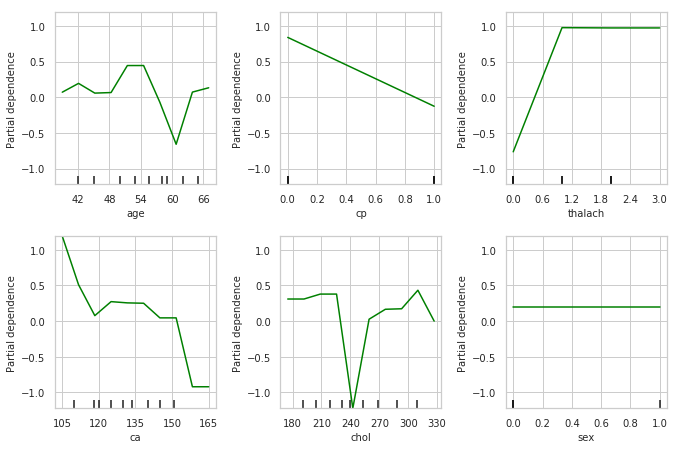

In [121]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

bg_color = (0.5, 0.5, 0.5)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "axes.titlesize":20,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':10,
            'figure.figsize':(10.0, 10.0),
            'xtick.labelsize':10,
            'ytick.labelsize':10})
sns.set_style("whitegrid")
my_model = GradientBoostingClassifier()
my_model.fit(X=train_X, y=train_y)
# Here we make the plot
my_plots = plot_partial_dependence(my_model ,       
                                   features=[0,1, 2,3,4,5], # column numbers of plots we want to show
                                   X=train_X,            # raw predictors data.
                                   feature_names=['age','cp', 'thalach','ca','chol','sex'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis
plt.show()

####  Interpreting Partial Dependence Plots

The top left plot shows the partial dependence between our target varaible Heart disease present or absent, and the age variable in years. 

* ca: number of major vessels (0-3) colored by flourosopy, having more major vessels colored by flouroscopy reduces your risk of a heart disease.

* cp: Having chest pain type 1 (typical angina) increases your  average probability of having  a heart disease. The increasing chance of heart disease remains constant for chest pain types 2,3 and 4.
*  thalach: maximum heart rate achieved  above 120 increases your risk of heart disease.

* Being a male  slightly reduces your risk of a heart disease.
* chol: serum cholestoral in mg/dl, cholesterol level around 240 reduces your risk of heart disease. Above this level your risk goes up

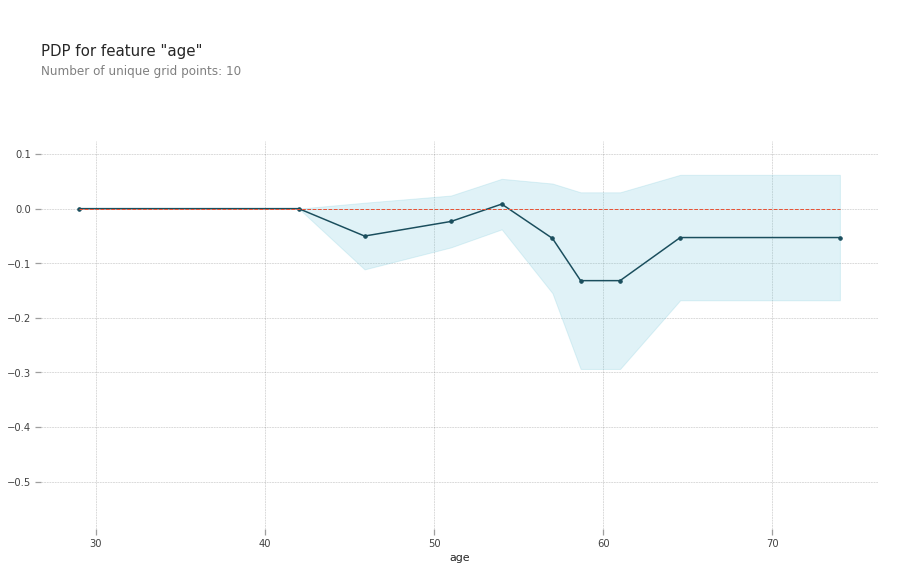

In [0]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=lgb_model, dataset=train_X,
                            model_features=val_X.columns.tolist(), feature='age')

# plot it
pdp.pdp_plot(pdp_goals, 'age')
plt.show()

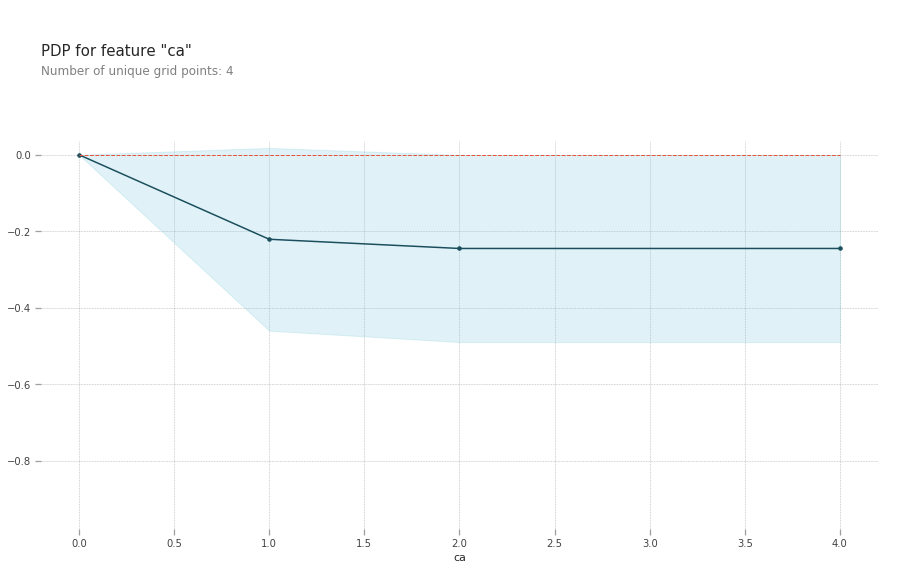

In [0]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=lgb_model, dataset=train_X,
                            model_features=val_X.columns.tolist(), feature='ca')

# plot it
pdp.pdp_plot(pdp_goals, 'ca')
plt.show()

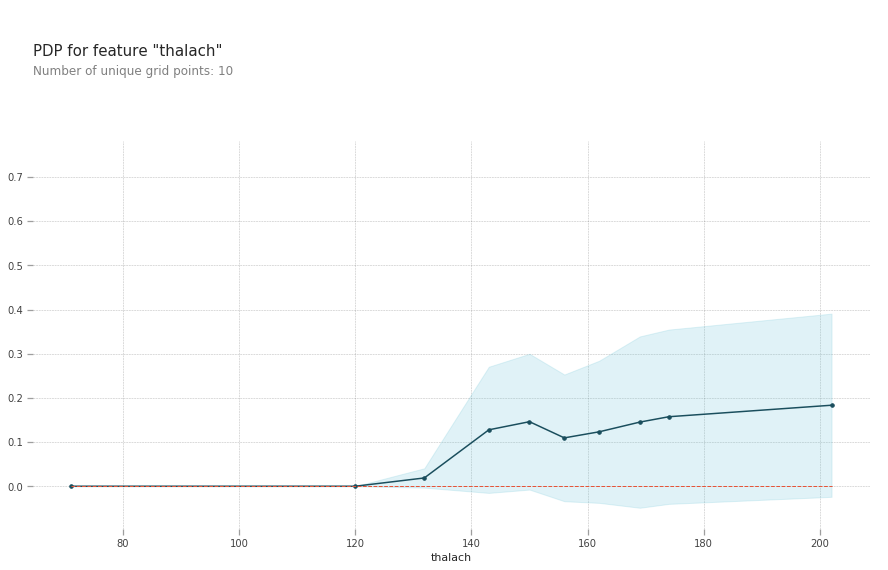

In [0]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=lgb_model, dataset=train_X,
                            model_features=val_X.columns.tolist(), feature='thalach')

# plot it
pdp.pdp_plot(pdp_goals, 'thalach')
plt.show()

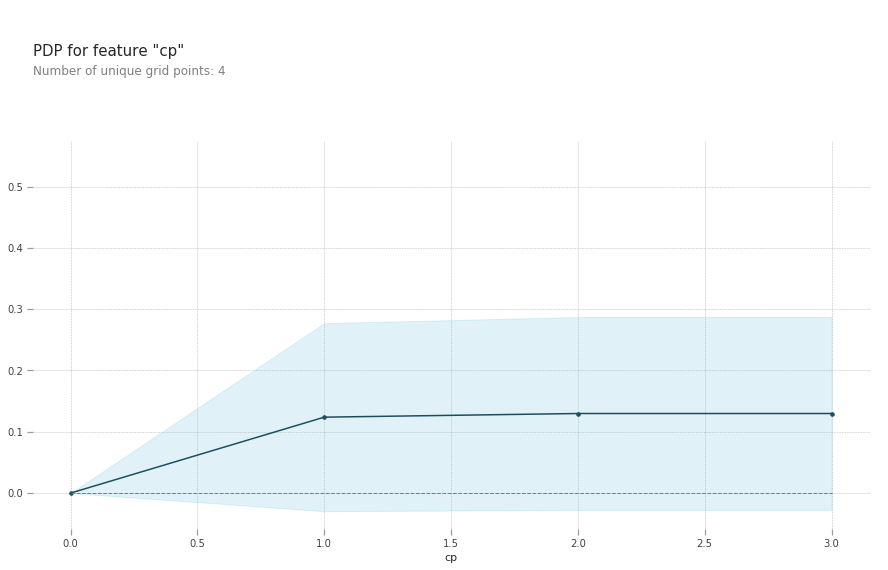

In [0]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=lgb_model, dataset=train_X,
                            model_features=val_X.columns.tolist(), feature='cp')

# plot it
pdp.pdp_plot(pdp_goals, 'cp')
plt.show()

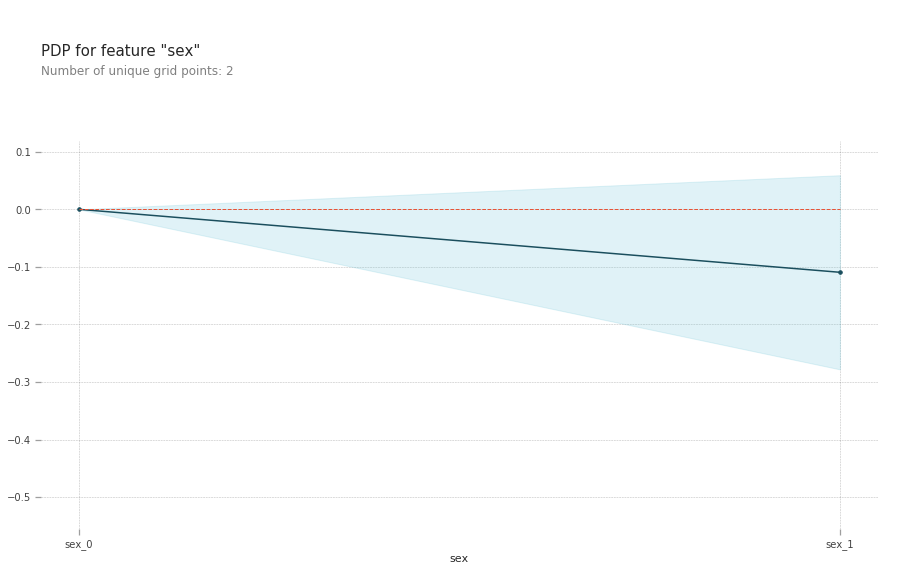

In [0]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=lgb_model, dataset=train_X,
                            model_features=val_X.columns.tolist(), feature='sex')

# plot it
pdp.pdp_plot(pdp_goals, 'sex')
plt.show()

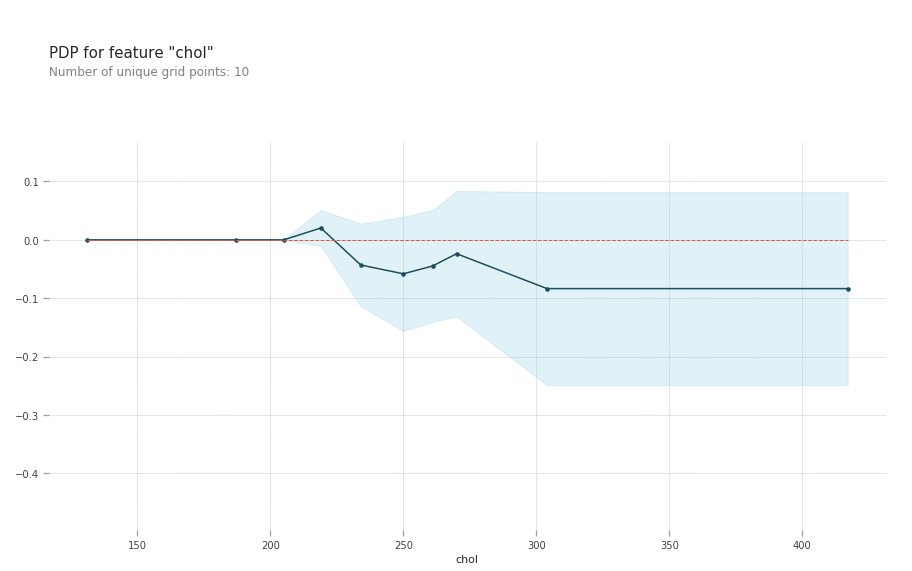

In [0]:
# Create the data that we will plot
sns.set_style("whitegrid")
pdp_goals = pdp.pdp_isolate(model=lgb_model, dataset=val_X,
                            model_features=val_X.columns.tolist(), feature='chol')

# plot it
pdp.pdp_plot(pdp_goals, 'chol')
plt.show()

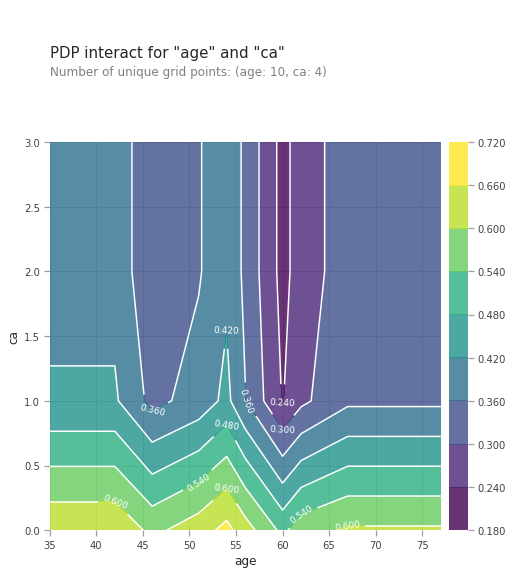

In [0]:
sns.set_style("whitegrid")
pdp_interaction = pdp.pdp_interact(model=lgb_model, dataset=val_X, model_features=val_X.columns.tolist(), features=['age', 'ca'])
pdp.pdp_interact_plot(pdp_interact_out=pdp_interaction, feature_names=['age', 'ca'], plot_type='contour')
plt.show()

Combined  effect of age and ca , number of major vessels (0-3) colored by flourosopy on heart disease prediction is shown above. Any age combined with low ca number increases the risk of heart disease. This is shown by the yellow colors  just above the horizontal axis. Any age also with high ca number reduces the risk if a heart disease shown by blue and purple regions higher up the chart. The effect of ca number on heart disease prediction is stronger than the age variable.

#### SHapley Additive exPlanations (SHAP) Values

SHAP measures the impact of features taking into account the interaction with other features.
Shapley values calculate the  feature importance by comparing two predictions, one with the feature included and the other without it. The positive SHAP values affect the prediction/target variable positively whereas the negative SHAP values affect the target negatively. The effects of a feature on a single example of the data can also be studied with SHAP values. 
The SHAP method is used to calculate influences of variables on the particular observation. This technique was borrowed from game theory. SHAP is model agnostic, it works with a variety of supervised machine learning models form xgboost, lightgbm, deep learning models.



In [0]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
#X,y = shap.datasets.boston()
#model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(train_X, label=train_y), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(train_X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], train_X.iloc[0,:])

The above explanation shows features each contributing to push the model prediction from the base value (the average model prediction over the training dataset we passed) to the model prediction. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue .

Exlanations for the whole dataset can be obtained by combining many explanations , rotating  them 90 degrees, and then stacking them horizontally

In [0]:
# visualize the training set predictions
# load JS visualization code to notebook
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, train_X)

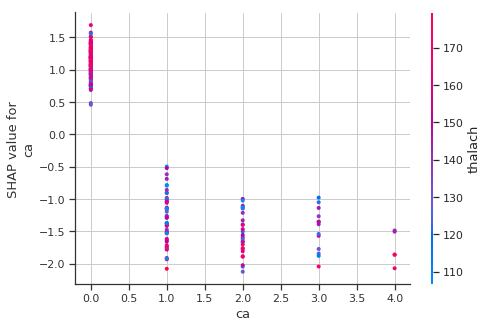

In [0]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
sns.set_style("whitegrid")
shap.dependence_plot("ca", shap_values, train_X)

The most important features  for the model contributing to the risk of heart disease can be shown by plotting the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low)

1. High ca (number of major vessels (0-3) colored by flourosopy) lowers the predicted probabilty of having a heart disease.

2. Belonging to a low  cp (chest pain type) category  lowers the predicted probabilty of having a heart disease.

3. Being a male reduces your chance of a heart disease.

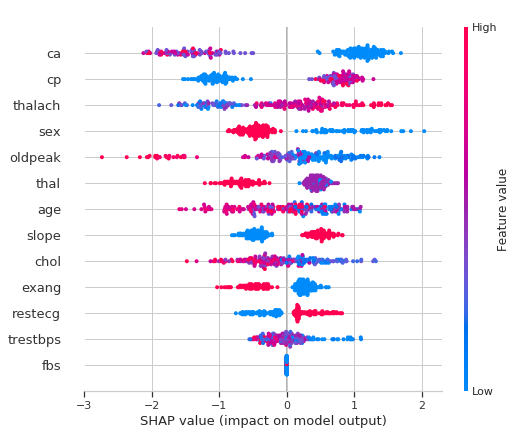

In [0]:
# summarize the effects of all the features
sns.set_style("whitegrid")
shap.summary_plot(shap_values, train_X)


Variable importance plot can be plotted by taking the mean absolute value of the SHAP values for each feature.

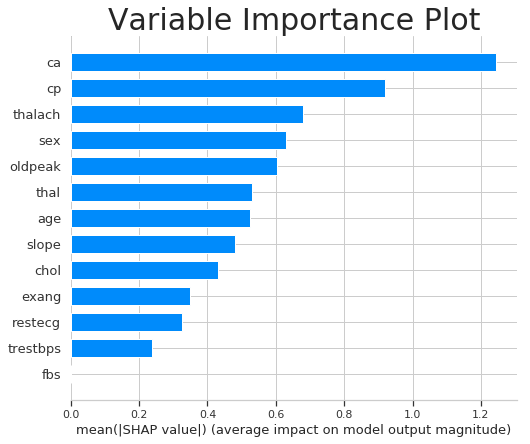

In [0]:
sns.set_style("whitegrid")
plt.title("Variable Importance Plot")
shap.summary_plot(shap_values, train_X, plot_type="bar")


#### Local Interpretable Model-Agnostic Explanations (LIME )
LIME is model-agnostic, meaning that it can be applied to any machine learning model. The  parts of the interpretable input contributing to the prediction is determined by perturbing the input around its neighborhood and observe how the model's predictions change. The perturbed data  is weighed  by their proximity to the original example, and learn an interpretable model on those and the associated predictions. 
 


#### Create the explainer
Tabular explainers use a training set to compute  statistics on each feature.  For continouous features,statistics such as  the mean, standard deviation and discretizing  into quartiles  are computed.Frequency is computed for each categorical feature. The computed statistics are used to scale the data, so that we can meaningfully compute distances when the attributes are not on the same scale. It is also used to  sample perturbed instances - which we do by sampling from a Normal(0,1), multiplying by the std and adding back the mean.





In [116]:
from lime import lime_text
from lime import *
import lime
from sklearn.pipeline import make_pipeline


predict_fn_lgbm = lambda x: lgb_model.predict_proba(x).astype(float)

X_val=val_X.as_matrix()

#target_names= ['1','0']
target_names= [str(i) for  i in train_y.unique()]

explainer = lime.lime_tabular.LimeTabularExplainer(X_val, feature_names=train_X.columns.tolist(), class_names=target_names, discretize_continuous=True)

i = np.random.randint(0, val_X.shape[0])
exp = explainer.explain_instance(X_val[i], lgb_model.predict_proba, num_features=10, top_labels=1)

#We now explain a single instance:

exp.show_in_notebook(show_table=True, show_all=False)

#### Explaining Predictions

For the particular example/row of the feature dataset picked  randomly, the predicted target is not having a heart disease(0) with probability of 0.94. It can be inferred taht the features contributing to this prediction are the Feature Values shown in orange color above. These include ca, sex, cp, slope, thal, oldpeak and exang. The average  probability contribution to the target class predicition from the  individual features are shown in the midlle  barplot above. The remaining features decreases prediction of the target class 0.
